In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr=lr # 학습률

    def update(self, params, grads):
        for key in params.keys():
            params[key]-=self.lr*grads[key]

In [6]:
import numpy as np

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr=lr
        self.momentum=momentum
        self.v=None

    def update(self, params, grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key]=self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [10]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr=lr
        self.h=None

    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key]=np.zeros_like(val)

        for key in params.keys():
            self.h[key]+=grads[key]*grads[key]
            params[key]-=self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)

In [14]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000, 100)
node_num=100
hidden_layer_size=5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]

    w=np.random.randn(node_num, node_num)*1
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

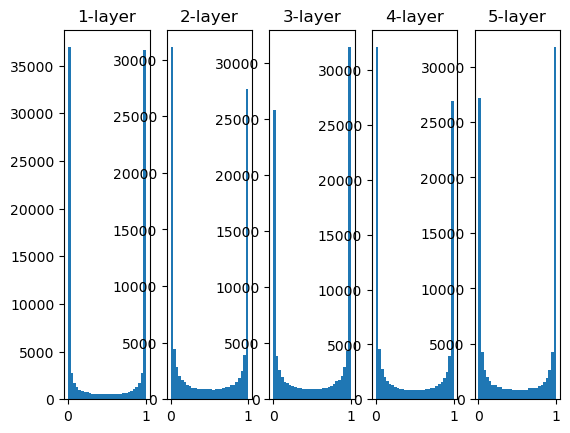

In [16]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

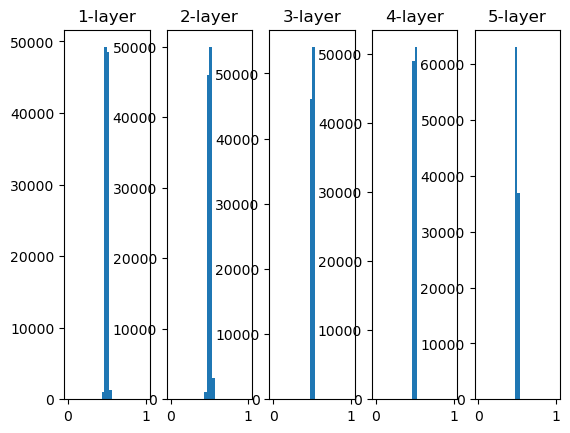

In [18]:
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]

    w=np.random.randn(node_num, node_num)*0.01 # 가중치의 표준편차가 0.01
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

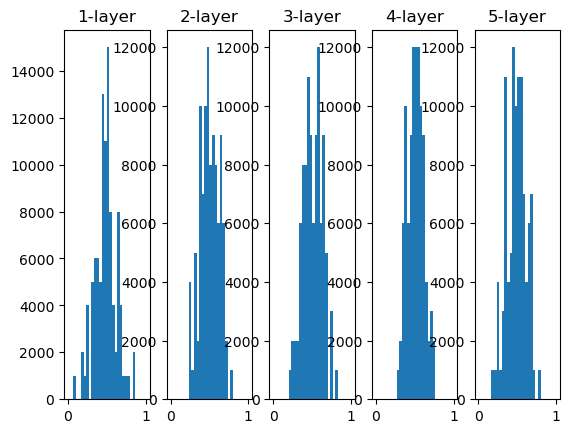

In [22]:
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]

    w=np.random.randn(node_num, node_num)/np.sqrt(node_num) # 
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 7주차_1

In [4]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
#오버피팅 재현
x_train=x_train[:300]
t_train=t_train[:300]

In [10]:
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD
import numpy as np
import pandas as pd

network=MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10)
optimizer=SGD(lr=0.01) # 학습률 0.01인 SGD로 매개변수 갱신
max_epochs=201
train_size=x_train.shape[0]
batch_size=100

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

iter_per_epoch=max(train_size/batch_size, 1)
epoch_cnt=0

for i in range(1000000000):
    batch_mask=np.random.choice(train_size, batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]

    grads=network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch==0:
        train_acc=network.accuracy(x_train, t_train)
        test_acc=network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt+=1
        if epoch_cnt>=max_epochs:
            break



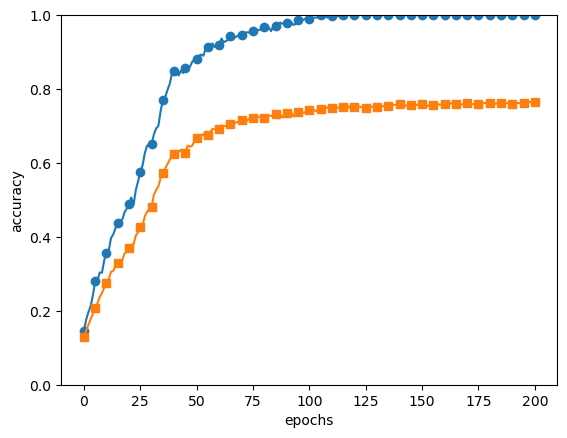

In [11]:
import matplotlib.pyplot as plt

x=np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train_accuracy', markevery=5)
plt.plot(x, test_acc_list, marker='s', label='test_accuracy', markevery=5)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

In [18]:
#드롭아웃
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio=dropout_ratio
        self.mask=None

    def forward(self, x, train_flg=True):
        if train_flg: # 훈련
            self.mask=np.random.rand(*x.shape)>self.dropout_ratio
            return x*self.mask
        else:
            return x*(1.0-self.dropout_ratio)

    def backward(self, dout):
        return dout*self.mask

In [20]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test)=load_mnist()

# 입력 데이터와 정답 섞기
x_train, t_train=shuffle_dataset(x_test, t_train)
validation_rate=0.20
validation_num=int(x_train.shape[0]*validation_rate)

x_val=x_train[:validation_num]
t_val=t_train[:validation_num]
x_train=x_train[validation_num:]
t_train=t_train[validation_num:]

In [22]:
weight_decay=10**np.random.uniform(-8,-4)
lr=10**np.random.uniform(-6, -2)

In [ ]:
# coding: utf-8
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

val acc:0.09 | lr:2.7293747978405482e-05, weight decay:7.465530725586841e-05
val acc:0.04 | lr:1.0956692114197025e-06, weight decay:3.909391217378475e-07
val acc:0.22 | lr:0.001489601040347378, weight decay:2.1123766124404937e-07
val acc:0.04 | lr:2.1561872463796066e-05, weight decay:2.1200447310072015e-07
val acc:0.09 | lr:8.481191650943746e-05, weight decay:5.88202240232376e-06
val acc:0.8 | lr:0.007637485468495451, weight decay:7.130381904470816e-05
val acc:0.1 | lr:0.0001909703181586255, weight decay:1.8208725700326085e-07
val acc:0.1 | lr:2.9950759819867265e-05, weight decay:9.808344202555246e-08
val acc:0.77 | lr:0.006848689527879275, weight decay:2.112156093355166e-07
val acc:0.3 | lr:0.001697598013057481, weight decay:1.057598272165254e-05
val acc:0.14 | lr:0.00014010524263223675, weight decay:7.091218725932267e-06
val acc:0.48 | lr:0.00269548342690038, weight decay:1.166647348096406e-06
val acc:0.06 | lr:8.638427502812424e-06, weight decay:2.90177108275516e-07
val acc:0.09 | l